In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("telco.csv")

In [3]:
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
custId = ['customerID']
target = ['Churn']

In [5]:
categorical = df_raw.nunique()[df_raw.nunique() < 5].keys().tolist()


In [6]:

categorical.remove("Churn")

In [7]:
numerical = [col for col in df_raw.columns if col not in custId  +target+ categorical]

In [8]:
numerical

['tenure', 'MonthlyCharges', 'TotalCharges']

In [9]:
y = df_raw['Churn'].map({'Yes': 1, "No": 0})
df_raw = df_raw.drop(columns=['Churn'])

df_raw = pd.get_dummies(data = df_raw,columns=categorical,drop_first=True)

In [10]:
df_raw.head()

,customerID,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,5575-GNVDE,34,56.95,1889.5,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,2,53.85,108.15,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,7795-CFOCW,45,42.30,1840.75,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,9237-HQITU,2,70.70,151.65,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [11]:
# there is " " in TotalCharges when i conver to number gives error

df_raw['TotalCharges'] = df_raw['TotalCharges'].replace(" ", 0)

from sklearn.preprocessing import StandardScaler

df_raw['TotalCharges'] = df_raw['TotalCharges'].astype(np.number)

scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(df_raw[numerical])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns= numerical)

In [12]:
scaled_numerical_df.head()

,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.992611
1,0.066327,-0.259629,-0.172165
2,-1.236724,-0.362660,-0.958066
3,0.514251,-0.746535,-0.193672
4,-1.236724,0.197365,-0.938874


In [13]:
df_raw = df_raw.drop(columns=numerical, axis = 1)


df =df_raw.merge(right=scaled_numerical_df,how='left', left_index=True, right_index=True)



In [14]:
# Class not in balance , over sampling or undersapling techniques

In [15]:

X = df.drop(columns=['customerID'], axis = 1)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score

In [17]:
X_train, X_test , y_train,y_test = train_test_split(X, y , test_size=0.25, shuffle=True, stratify=y)

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

C =[1, 0.5,0.25, 0.1,0.05, 0.025 , 0.01, 0.005, 0.0025]

l1_metrics = np.zeros((len(C), 5))
l1_metrics[:,0] = C

for i in range(0, len(C)):
    model = LogisticRegression(penalty='l1', C = C[i], solver ='liblinear')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    l1_metrics[i, 1] = np.count_nonzero(model.coef_)
    l1_metrics[i, 2] = accuracy_score(y_pred, y_test)
    l1_metrics[i, 3] = precision_score(y_pred, y_test)
    l1_metrics[i, 4] = recall_score(y_pred, y_test)

col_names =['C','Non Zeor Coef','Accuracy Score','Pricision Score', 'Recall Score']

metric = pd.DataFrame(l1_metrics, columns=col_names)
metric

/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,C,Non Zeor Coef,Accuracy Score,Pricision Score,Recall Score
0,1.0000,25.0,0.807496,0.567452,0.659204
1,0.5000,26.0,0.806360,0.563169,0.657500
2,0.2500,19.0,0.804089,0.554604,0.654040
3,0.1000,16.0,0.804089,0.548180,0.656410
4,0.0500,14.0,0.808064,0.550321,0.667532
5,0.0250,12.0,0.812039,0.537473,0.685792
6,0.0100,9.0,0.809199,0.466809,0.714754
7,0.0050,3.0,0.798410,0.372591,0.737288
8,0.0025,2.0,0.734810,0.000000,0.000000


In [21]:


model_logit = LogisticRegression(penalty='l1', C= 0.025, solver = 'liblinear')
model_logit.fit(X_train, y_train)
y_pred_logit = model_logit.predict(X_test)

In [22]:
from sklearn import tree


dept_list = list(range(2,15))
depth_tuning = np.zeros((len(dept_list),4))

depth_tuning[:,0] = dept_list

for i in range(0, len(C)):
    model = tree.DecisionTreeClassifier(max_depth=dept_list[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    depth_tuning[i, 1] = accuracy_score(y_pred, y_test)
    depth_tuning[i, 2] = precision_score(y_pred, y_test)
    depth_tuning[i, 3] = recall_score(y_pred, y_test)

col_names =['Max Depth','Accuracy Score','Pricision Score', 'Recall Score']

metric = pd.DataFrame(depth_tuning, columns=col_names)
metric



,Max Depth,Accuracy Score,Pricision Score,Recall Score
0,2.0,0.801249,0.426124,0.708185
1,3.0,0.801249,0.426124,0.708185
2,4.0,0.790460,0.507495,0.630319
3,5.0,0.800114,0.556745,0.641975
4,6.0,0.800114,0.486081,0.669617
5,7.0,0.798410,0.511777,0.653005
6,8.0,0.784214,0.556745,0.600462
7,9.0,0.779103,0.535332,0.592417
8,10.0,0.779671,0.526767,0.595642
9,11.0,0.000000,0.000000,0.000000


In [23]:
model_decision = tree.DecisionTreeClassifier(max_depth=5)
model_decision.fit(X_train, y_train)
y_pred_decision = model_decision.predict(X_test)

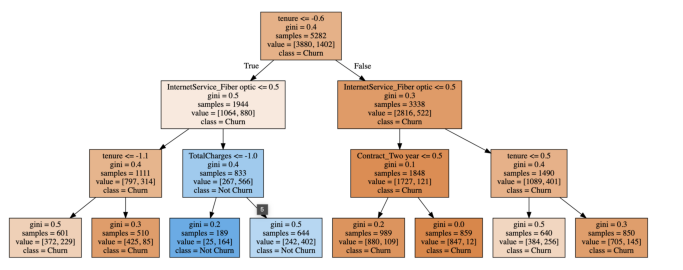

In [36]:
import graphviz

exported = tree.export_graphviz(decision_tree=model_decision,out_file=None,
                                feature_names=X_train.columns, precision=1,class_names=["Churn","Not Churn"],
                               filled=True)

graph = graphviz.Source(exported)
#display(graph)
import imageio
plt.figure(figsize=(12,12))
im = imageio.imread("graph.png")
plt.imshow(im)
plt.axis('off')
plt.show()